# NLTK Testing

El siguiente notebook es un ejercicio de uso de la librería NLTK para procesamiento de lenguaje natural **(NLP)** por sus siglas en inglés.

La primer parte es un ejercicio sencillo, siguiendo el tutorial en [hands-on-nltk-tutorial](https://github.com/hb20007/hands-on-nltk-tutorial/tree/main). Las primeras librerías importadas son las instruidas por el tutorial.

En la segunda parte veremos un ejercicio individual donde hago un intento por analizar un wiki de Harry Potter.

## Hands  on NLTK tutorial

In [1]:
import nltk # https://www.nltk.org/install.html
import numpy # https://www.scipy.org/install.html
import matplotlib.pyplot # https://matplotlib.org/downloads.html
import tweepy # https://github.com/tweepy/tweepy
import TwitterSearch # https://github.com/ckoepp/TwitterSearch
import unidecode # https://pypi.python.org/pypi/Unidecode
import langdetect # https://pypi.python.org/pypi/langdetect
import langid # https://github.com/saffsd/langid.py
import gensim # https://radimrehurek.com/gensim/install.html

In [2]:
# You also need to run nltk.download() in order to download NLTK before proceeding:
#nltk.download()

### Tokenización y herramientas básicas de Análisis

La tokenización se refiere al proceso de dividir un texto en unidades más pequeñas, llamadas "tokens". Estos tokens suelen ser palabras individuales. 

La tokenización es un paso fundamental en el procesamiento de lenguaje natural, ya que permite descomponer un texto en elementos más manejables para su posterior análisis.

In [3]:
from nltk.tokenize import RegexpTokenizer
from nltk.text import Text

In [4]:
texto = "Tres tristes tigres, tragaban trigo en un trigal, en tres tristes trastos, tragaban trigo tres tristes tigres."

In [5]:
tokenizer = RegexpTokenizer("[a-zA-Z'`éèî]+")
tokens = tokenizer.tokenize(texto)

In [6]:
t = Text(tokens)
t

<Text: Tres tristes tigres tragaban trigo en un trigal...>

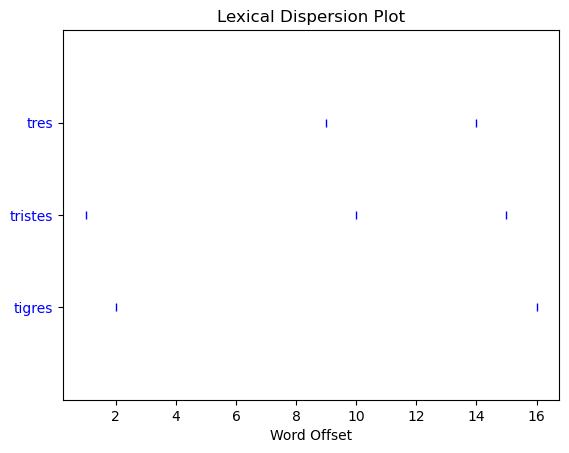

In [7]:
t.dispersion_plot(['tres', 'tristes', 'tigres'])

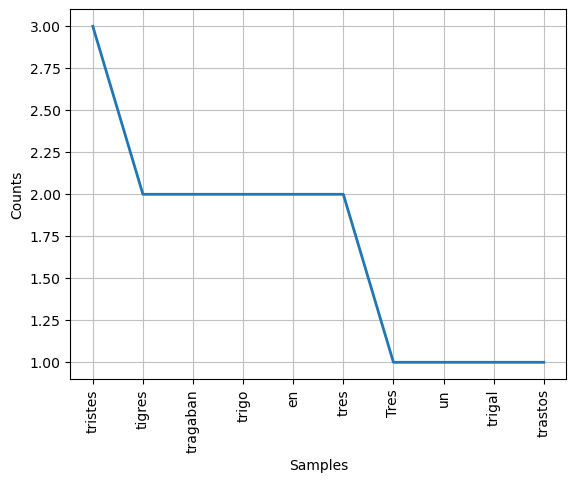

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
t.plot()

In [9]:
t.vocab()

FreqDist({'tristes': 3, 'tigres': 2, 'tragaban': 2, 'trigo': 2, 'en': 2, 'tres': 2, 'Tres': 1, 'un': 1, 'trigal': 1, 'trastos': 1})

## Ejercicio de extracción de texto WEB

Leyendo de Wikipedia voy a extraer el texto para **tokenizar**, remover "**stop words**", y realizar un ejercicio de extracción de entidades nominadas (**NER**, por sus siglas en inglés).

La página a leer es la siguiente: [Harry Potter](https://en.wikipedia.org/wiki/Harry_Potter)

### Extracción de texto y tokenización

Se hace uso en conjunto de las librerías BeautifulSoup y NLTK para extraer texto de la página web y tokenizar las palabras para su manejo y análisis.

In [10]:
import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

Estos paquetes de NLTK los descargué durante el proceso del siguiente ejercicio. Basta con descargarlos una única vez. Los dejé como comentario por ahora para evitar entorpecer mi ejercicio.

In [11]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('averaged_perceptron_tagger')

In [12]:
url = "https://en.wikipedia.org/wiki/Harry_Potter"
response = requests.get(url)
html = response.text

In [13]:
soup = BeautifulSoup(html, 'html.parser')
text = soup.get_text()
tokens = nltk.word_tokenize(text)
#words=[tokens.lower() for word in tokens if word.isalpha()]

print(tokens)

['Harry', 'Potter', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Languages', 'Language', 'links', 'are', 'at', 'the', 'top', 'of', 'the', 'page', 'across', 'from', 'the', 'title', '.', 'Search', 'Search', 'Create', 'accountLog', 'in', 'Personal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1Plot', 'Toggle', 'Plot', 'subsection', '1.1Early', 'years', '1.2Voldemort', 'returns', '2Style', 'and', 'allusions', 'Toggle', 'Style', 'and', 'allusions', 'subsection', '2.1Genre', 'and', 'style', '2.2Allusions', '3Themes', '4Development', 'history', 'Toggle', 'Development', 'history', 'subsection'

#### Observaciones

Dándole un vistazo a los tokens formados, por un momento va bien hasta llegar a las tablas de idiomas o tablas de contenidos en Wikipedia, después de eso se compone y lee el texto como se quiere. Habrá que ver dónde y cómo corregir eso; si habrá que delimitar los argumentos de BeautifulSoup, o hacer una limpieza con fórmular de Python, o si hay una mejor manera de hacerlo con NLTK.

Una opción sería eliminar todos los caracteres que no sean letras del alfabeto romano, pero se perdería información que podría ser de interés como fechas, edades, etc.

### Remover Stop Words

Este proceso fue sencillo, exitosamente removimos palabras conectores como "and", "to", "also", etc.

In [14]:
stop_words = set(stopwords.words('english'))  # 'es' para español, elige el idioma que necesites
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print(filtered_tokens)

['Harry', 'Potter', '-', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Languages', 'Language', 'links', 'top', 'page', 'across', 'title', '.', 'Search', 'Search', 'Create', 'accountLog', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', '(', 'Top', ')', '1Plot', 'Toggle', 'Plot', 'subsection', '1.1Early', 'years', '1.2Voldemort', 'returns', '2Style', 'allusions', 'Toggle', 'Style', 'allusions', 'subsection', '2.1Genre', 'style', '2.2Allusions', '3Themes', '4Development', 'history', 'Toggle', 'Development', 'history', 'subsection', '4.1Publishing', 'history', '4.2Translations', '4.3Cover', 'art', '5Reception', 'Toggle', 'Reception', 'subsection', '5.1Comm

### Reconocimiento de Entidades Nombradas o (**NER**)

La siguiente función realiza la tokenización y hace uso de la función "pos_tag" para clasificar las palabras en el texto. De ahí extrae aquellas que tienen la sub-etiqueta "PERSON" de la etiqueta principal.

In [15]:
from nltk import ne_chunk, pos_tag, word_tokenize

def extract_person_names(text):
    # Tokeniza el texto
    tokens = word_tokenize(text)

    # Etiqueta las palabras por partes del habla (POS)
    tagged_tokens = pos_tag(tokens)

    # Ejecuta el NER con chunking
    ne_tree = ne_chunk(tagged_tokens)

    # Inicializa una lista para almacenar los nombres de personas
    person_names = []

    for subtree in ne_tree:
        if isinstance(subtree, nltk.Tree) and subtree.label() == 'PERSON':
            person_name = " ".join([word for word, tag in subtree.leaves()])
            person_names.append(person_name)

    return person_names

In [16]:
tagged_tokens = pos_tag(tokens)
tagged_tokens

[('Harry', 'NNP'),
 ('Potter', 'NNP'),
 ('-', ':'),
 ('Wikipedia', 'NNP'),
 ('Jump', 'NNP'),
 ('to', 'TO'),
 ('content', 'VB'),
 ('Main', 'NNP'),
 ('menu', 'NN'),
 ('Main', 'NNP'),
 ('menu', 'NN'),
 ('move', 'NN'),
 ('to', 'TO'),
 ('sidebar', 'VB'),
 ('hide', 'JJ'),
 ('Navigation', 'NNP'),
 ('Main', 'NNP'),
 ('pageContentsCurrent', 'NN'),
 ('eventsRandom', 'NN'),
 ('articleAbout', 'IN'),
 ('WikipediaContact', 'NNP'),
 ('usDonate', 'JJ'),
 ('Contribute', 'NNP'),
 ('HelpLearn', 'NNP'),
 ('to', 'TO'),
 ('editCommunity', 'VB'),
 ('portalRecent', 'JJ'),
 ('changesUpload', 'NN'),
 ('file', 'NN'),
 ('Languages', 'NNP'),
 ('Language', 'NNP'),
 ('links', 'NNS'),
 ('are', 'VBP'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('top', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('page', 'NN'),
 ('across', 'IN'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('title', 'NN'),
 ('.', '.'),
 ('Search', 'NNP'),
 ('Search', 'NNP'),
 ('Create', 'NNP'),
 ('accountLog', 'NN'),
 ('in', 'IN'),
 ('Personal', 'NNP'),
 ('tools', 'NNS'),
 ('C

In [17]:
names = extract_person_names(text)
print(names)

['Harry', 'Potter', 'Wikipedia Jump', 'Languages Language', 'Search Search Create', 'Toggle Style', 'Toggle Development', 'Toggle Adaptations', 'Harry Potter', 'Gõychi', 'Tools Tools', 'Fantasy', 'Harry Potter', 'Harry Potter', 'Harry Potter', 'Harry Potter Philosopher', 'Deathly Hallows', 'Taylor', 'Cliff Wright', 'Giles Greenfield', 'Jason CockcroftCountryUnited', 'Audiobook', 'Harry Potter', 'Harry Potter', 'Hermione Granger', 'Ron Weasley', 'Harry', 'Lord Voldemort', 'Harry Potter', 'Harry Potter', 'Warner Bros. Pictures', 'Harry', 'Harry Potter', 'Harry Potter', 'Plot', 'Harry Potter', 'Harry Potter', 'Harry Potter', 'Harry Potter', 'Harry', 'Harry', 'Hagrid', 'Harry', 'Lily', 'James Potter', 'Lord Voldemort', 'Harry', 'Voldemort', 'Harry', 'Voldemort', 'Harry', 'Harry', 'Harry', 'Ron Weasley', 'Hermione Granger', 'Draco Malfoy', 'Harry', 'Albus Dumbledore', 'Severus Snape', 'Quirinus Quirrell', 'Voldemort', 'Harry', 'Voldemort', 'Harry Potter', 'Harry', 'Harry', 'Hermione', 'Ron'

#### Observaciones
Podemos ver que en casos lee cosas como "Search Search Create" o "London Harry Potter" que no es lo que queremos. Me imagino esto debe corregirse desde el **stemming**, **stop word removing**, o **tokenización** incluso.

Según leí, el proceso de **NER** está mejor implementado en spaCy debido al manejo de objetos, pero no soy experto.